## BST 267: Introduction to Social and Biological Networks (2022)

# Homework 2


### Question 1: Python practice: Squares and cubes of integers (2 points)

Create a list called `numbers` that contains numbers 1,2,3,...,20. Compute the squares and the cubes of the numbers on this list and store them in a list called `squares` and `cubes`, respectively. Print out the elements of `numbers` and `squares` and `cubes` side by side. Then run the code below to create a plot. Make sure you understand the plotting code. What are the slopes of the two lines in the right panel plot?

In [3]:
# ADD YOUR CODE HERE
# Create a list called `numbers` that contains numbers 1,2,3,...,20. 
numbers = list(range(1,21))
# Compute the squares and the cubes of the numbers on this list 
squares = [x**2 for x in numbers]
cubes = [x**3 for x in numbers]

<IPython.core.display.Javascript object>


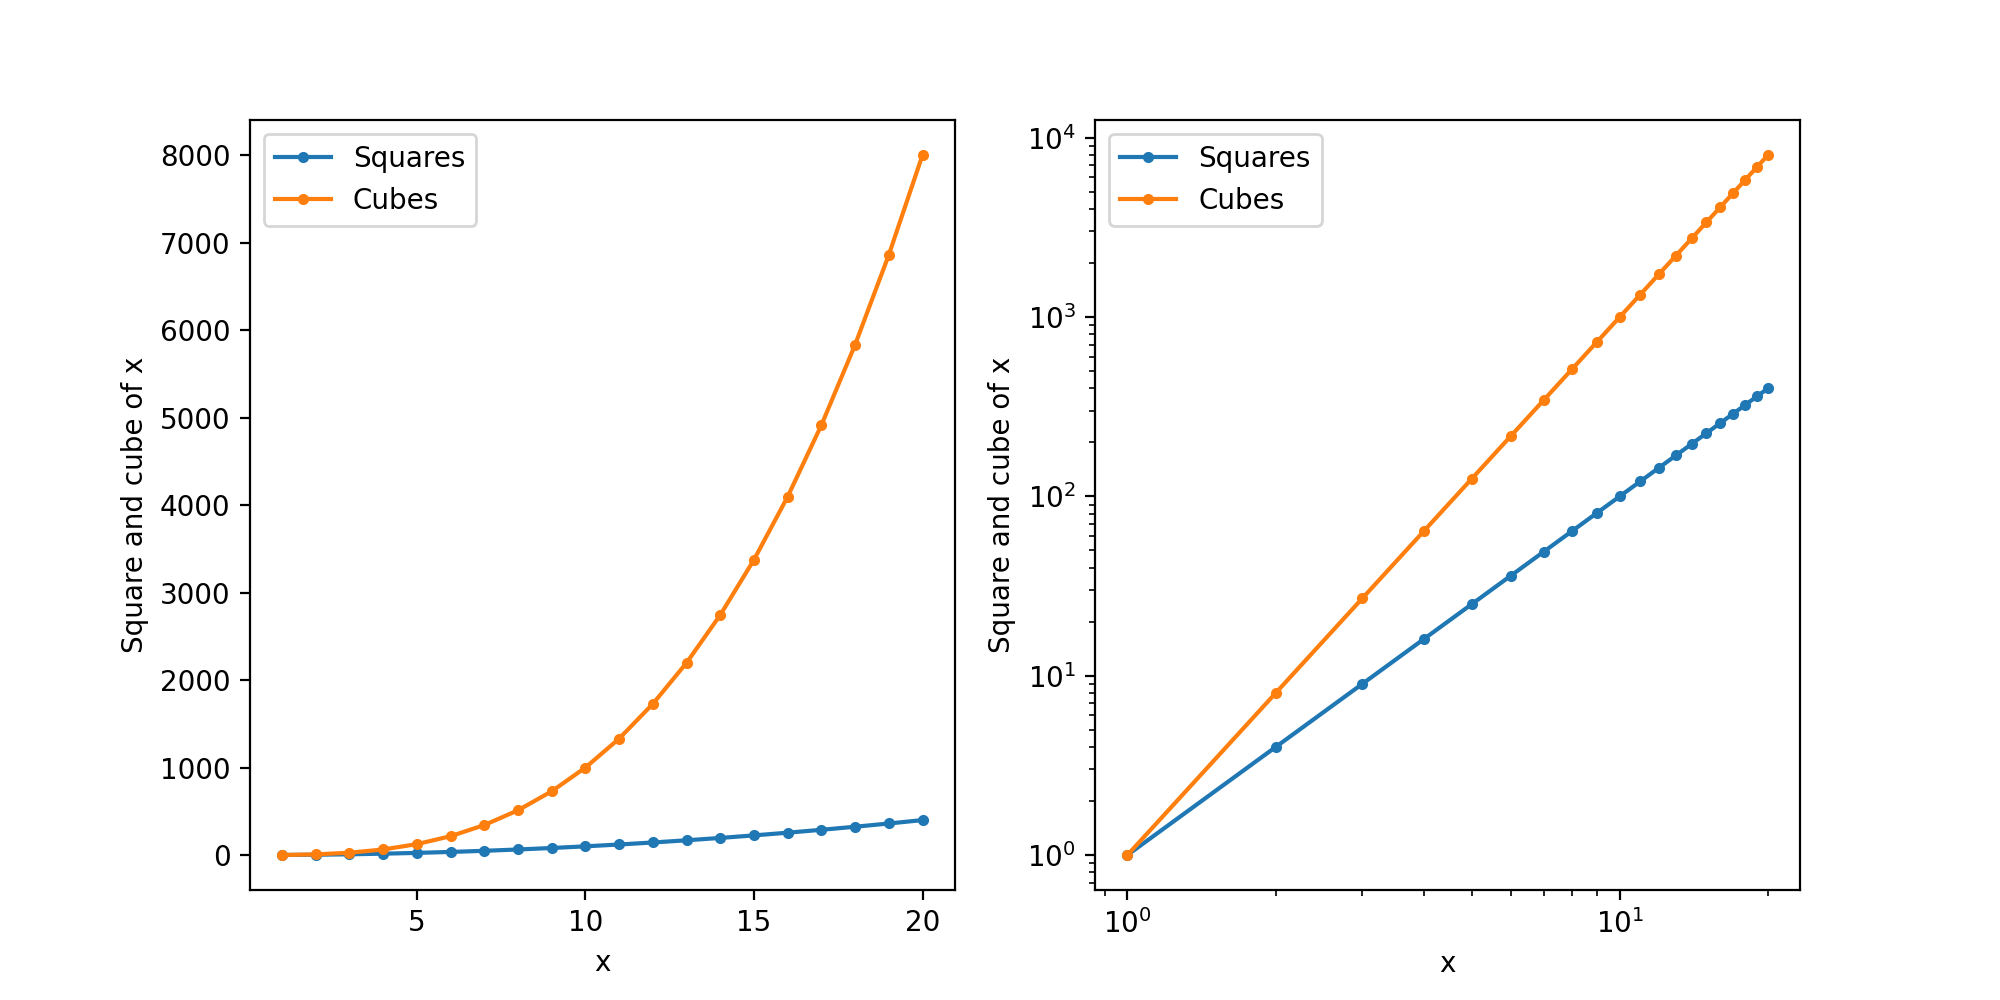

In [4]:
# RUN THIS CODE
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(numbers, squares, '.-', label="Squares")
plt.plot(numbers, cubes, '.-', label="Cubes")
plt.xlabel("x")
plt.ylabel("Square and cube of x")
plt.legend()

plt.subplot(122)
plt.loglog(numbers, squares, '.-', label="Squares")
plt.loglog(numbers, cubes, '.-', label="Cubes")
plt.xlabel("x")
plt.ylabel("Square and cube of x")
plt.legend();

**ANSWERS:**

Slopes are: 3 for "Cubes" and 2 for "Squares"


### Question 2: Adjacency matrix for directed graph (2 points)

Most numerical computing in Python is done using the `numpy` library. It is especially useful if computing with large 1-dimensional arrays (vectors) or 2-dimensional arrays (matrices). The following code generates a random matrix consisting of zeros and ones only. We can interpret the matrix as an adjacency matrix of a directed graph. Compute and store the in-degree of each node in a `np.array` object called `in_degree`; similarly, compute and store the out-degree of each node in an array called `out_degree`. Print out the adjacency matrix `A` and the in- and out-degree vectors.

In [8]:
# RUN THIS CODE
import numpy as np
np.random.seed(2022)
A = np.random.randint(0, 2, (10,10))

# ADD YOUR CODE HERE
# Compute and store the in-degree of each node in a `np.array` object called `in_degree`
in_degree = np.sum(A, axis=0)
# compute and store the out-degree of each node in an array called `out_degree`
out_degree = np.sum(A, axis=1)
#Print out the adjacency matrix `A` and the in- and out-degree vectors.
print("Adjacency matrix ", A)
print("In-degree vector ", in_degree)
print("Out-degree vector ", out_degree)

Adjacency matrix  [[1 0 1 0 1 1 0 1 0 0]
 [0 0 1 1 1 1 1 1 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [0 1 0 1 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 1]
 [0 1 1 0 0 0 0 1 1 0]
 [0 1 0 1 1 1 1 1 1 1]
 [0 1 1 1 0 0 0 0 1 0]
 [0 1 0 1 1 0 0 1 1 1]
 [1 0 1 1 1 1 0 1 1 0]]
In-degree vector  [3 7 6 8 5 4 3 8 6 4]
Out-degree vector  [5 6 3 6 5 4 8 4 6 7]


### Question 3: Clustering (2 points)

Clustering coefficient tells us how densely the neighbors of a given node are connected. There are many ways to define this quantity, but in this question you should implement in Python what we called in class local clustering coefficient. Let $t_i$ denote the number of ties that exist among the neighbors of node $i$. The clustering coefficient for node $i$ is defined as follows:

$$c_i = \frac{t_i}{k_i(k_i-1)/2}.$$

Write a Python function called `clustering` that takes as its inputs 1) an undirected graph object and 2) node ID. The function should return the value of the clustering coefficient for the given node. Use the function to calculate the value of the clustering coefficient of node 100 in graph `G` below.

In [11]:
# RUN THIS CODE
import networkx as nx
G = nx.erdos_renyi_graph(1000, 0.1, seed=123)

# ADD YOUR CODE HERE
# Write a Python function called `clustering` that takes as its inputs
# 1) an undirected graph object and 2) node ID. 
# The function should return the value of the clustering coefficient for the given node. 
def clustering(G, node):
    # Compute the clustering coefficient for the given node and return it. 
    neighbors = list(G.neighbors(node))
    if len(neighbors) == 0:
        return 0
    else:
        edges = 0
        for i in range(len(neighbors)):
            for j in range(i+1, len(neighbors)):
                if G.has_edge(neighbors[i], neighbors[j]):
                    edges += 1
        return edges/(len(neighbors)*(len(neighbors)-1)/2)

# Use the function to calculate the value of the clustering coefficient of node 100 in graph `G` below.
clustering_coef_100 = clustering(G, 100)
print(clustering_coef_100)

0.09974979149291076


### Question 4: Random nodes and random neighbors (2 points)

The code below generates a so-called Barabasi-Albert graph of 10,000 nodes. These graphs, to be discussed in more detail later, have very skewed degree distributions: although most nodes have a low degree, a few nodes have a very high degree. This means that a node and its neighbor may have vastly different degrees, which leads to many interesting network phenomena.

Write code to sample 100 nodes from this graph in two different ways. First, generate a sample of 100 nodes chosen unformly at random from the graph. Second, generate a sample of 100 nodes by first choosing a node uniformly at random and then choosing one of the neighbors of that node uniformly at random. In the second approach, the nodes in the sample are the randomly chosen neighbors, not the nodes initially sampled. For both approaches you're allowed to pick the same node multiple times (sampling with replacement).

Print out the average degree of nodes in each sample and interpret the result.

In [13]:
import networkx as nx
import random
import numpy as np
G = nx.barabasi_albert_graph(10000, 2, seed=50)

# ADD YOUR CODE HERE
sample1 = random.sample(G.nodes(), 100)
sample2 = random.sample(G.nodes(), 1)
for i in range(99):
    sample2.append(random.choice(list(G.neighbors(sample2[i]))))
sample2
# Print out the average degree of nodes in each sample and interpret the result.
print("Average degree of nodes in sample1: ", np.mean([G.degree(node) for node in sample1]))
print("Average degree of nodes in sample2: ", np.mean([G.degree(node) for node in sample2]))


Average degree of nodes in sample1:  4.65
Average degree of nodes in sample2:  15.97


/var/folders/19/s4zdyd_16mb8h239mgwds83m0000gn/T/ipykernel_36549/3336934174.py:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample1 = random.sample(G.nodes(), 100)
/var/folders/19/s4zdyd_16mb8h239mgwds83m0000gn/T/ipykernel_36549/3336934174.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample2 = random.sample(G.nodes(), 1)
